# Porto Seguro’s Safe Driver Prediction-EDA

Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years.

Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones.

In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

#### Data Description:

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

#### File descriptions:
train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
test.csv contains the test data.
sample_submission.csv is submission file showing the correct format.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data into csv file

data=pd.read_csv('train.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

#### There are no null values present in any of the features . 

In [4]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### For some of the continuous features, the values upto third quartile 75% looks uniformly distributed and there is a overshoot of values in the final  quartile. i.e)The difference between the 100th and 75th  percentile is more. This could be due to the presence of outliers which needs to be removed or standardised inorder to reduce the outlier impact on the model. 

In [5]:
#Data duplication check

data.duplicated().sum()

0

#### There are no duplicate data in the dataset

In [6]:
data.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


% of datapoints with class=0 is  96.35524821408171 %
% of datapoints with class=1 is  3.6447517859182947 %


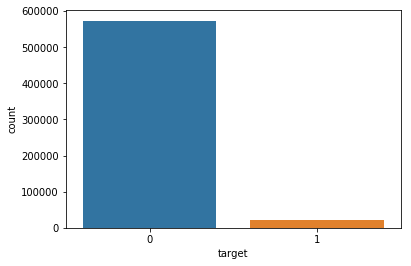

In [7]:
sns.countplot(data['target'])
print("% of datapoints with class=0 is ",(data['target']==0).sum() *100 /595212,'%')
print("% of datapoints with class=1 is ",(data['target']==1).sum() *100 /595212,'%')

#### The data is extremely imbalanced between the classes as seen above. There is only 3.6% of data which belongs to Class-1 however the remaining 96.4% belongs to Class-0.

In [8]:
temp_y=data['target']
temp_x=data.drop(['id','target'],axis=1)

In [9]:
## Missing values % in the data

miss_columns=temp_x.eq(-1).sum()
colname=temp_x.columns
for i in range(len(miss_columns)):
    if miss_columns[i]!=0:
        print("The missing value % in column",colname[i],"is", miss_columns[i]*100/595212,'%')

The missing value % in column ps_ind_02_cat is 0.03628959093566662 %
The missing value % in column ps_ind_04_cat is 0.013944611331760785 %
The missing value % in column ps_ind_05_cat is 0.975954785857812 %
The missing value % in column ps_reg_03 is 18.106489788512327 %
The missing value % in column ps_car_01_cat is 0.01797678810239041 %
The missing value % in column ps_car_02_cat is 0.0008400368272145051 %
The missing value % in column ps_car_03_cat is 69.08983689844963 %
The missing value % in column ps_car_05_cat is 44.78253126617071 %
The missing value % in column ps_car_07_cat is 1.9302366215734899 %
The missing value % in column ps_car_09_cat is 0.09559619093701067 %
The missing value % in column ps_car_11 is 0.0008400368272145051 %
The missing value % in column ps_car_12 is 0.000168007365442901 %
The missing value % in column ps_car_14 is 7.160473915176441 %


#### The missing values (%) are significantly high for the features ps_car_03_cat, ps_car_05_cat, ps_car_14 and ps_reg_03 having more than 5% which needs to be handled either through mean or mode before we proceed with modelling. For categorical features having missing values % greater than 5%, we could consider the missing value as a different category by itself. We also have missing values for other features as well but its not very much significant and it needs to be handled by any of the imputation methods. 

## Feature importance

In [10]:
#Data split for train and test using Stratify

data_y=data['target']
data_x=data.drop(['id','target'],axis=1)
#data_x.head()
X_train, X_test, y_train, y_test = train_test_split(data_x,data_y, test_size=0.33, stratify=data_y,random_state=42)

In [16]:
#Feature selection using Gradient Boost Classifier


base=XGBClassifier(n_estimators=200,n_jobs=-1,random_state = 42)
Xgmodel=SelectFromModel(base,max_features=15)
Xgmodel.fit(X_train,y_train)

SelectFromModel(estimator=XGBClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42),
                max_features=15)

In [17]:
#XGBoost feature importance


imp_feature=X_train.columns[Xgmodel.get_support()]
print(imp_feature)

Index(['ps_ind_03', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_03_cat',
       'ps_car_07_cat', 'ps_car_13'],
      dtype='object')


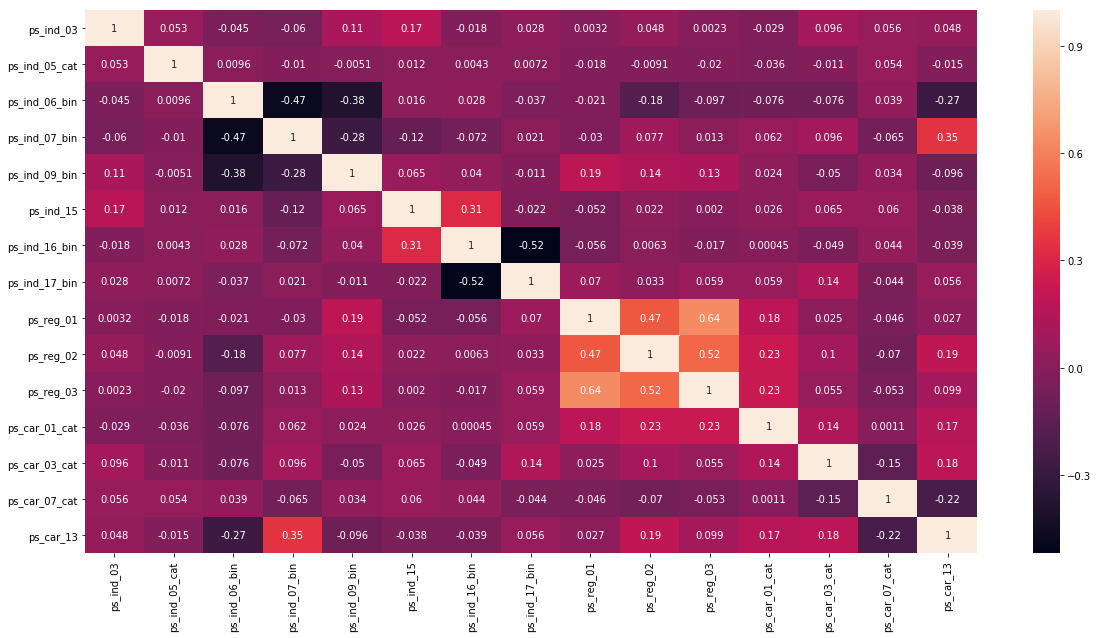

In [18]:
f, ax = plt.subplots(figsize=(20,10))
correl=data_x[imp_feature].corr()
sns.heatmap(correl, annot=True,ax=ax)

There is no much of a correlation between most of the features except some which experience some correlation. The features ps_ind_16_bin and ps_ind_17_bin are highly negative correlated upto 0.52 and the features ps_ind_17_bin and ps_ind_06_bin are negatively correlated upto 0.47. the highest positive correlation exists between ps_reg_01 and ps_reg_03 with 0.64. Some significant positive correlation exists between (ps_reg_02 and ps_reg_03) and (ps_reg_01 and ps_reg_02) with 0.52 and 0.47 respectively. Rest of the correlation value doesn't affect much on the decision of the model.  

## UNIVARIATE ANALYSIS

## Categorical Features EDA

In [11]:
# EDA for Categorical features so we have seggregated only the important categorical features found as a result of feature selection.

cat_features=data[['ps_car_01_cat', 'ps_car_03_cat','ps_ind_05_cat', 'ps_car_07_cat','target']]
cat_features.head()


,ps_car_01_cat,ps_car_03_cat,ps_ind_05_cat,ps_car_07_cat,target
0,10,-1,0,1,0
1,11,-1,0,1,0
2,7,-1,0,1,0
3,7,0,0,1,0
4,11,-1,0,1,0


In [12]:
#Count of unique values in each category.  

cat_features.nunique()


ps_car_01_cat    13
ps_car_03_cat     3
ps_ind_05_cat     8
ps_car_07_cat     3
target            2
dtype: int64

Category= -1 Count= 107 positive= 31.77570093457944 % negative= 68.22429906542057 %
Category= 0 Count= 5904 positive= 4.386856368563685 % negative= 95.61314363143632 %
Category= 1 Count= 1367 positive= 4.6817849305047545 % negative= 95.31821506949524 %
Category= 2 Count= 2144 positive= 4.291044776119403 % negative= 95.7089552238806 %
Category= 3 Count= 6658 positive= 3.7548813457494745 % negative= 96.24511865425053 %
Category= 4 Count= 26174 positive= 3.916099946511806 % negative= 96.0839000534882 %
Category= 5 Count= 18142 positive= 3.924594862749421 % negative= 96.07540513725058 %
Category= 6 Count= 62393 positive= 2.976295417755197 % negative= 97.0237045822448 %
Category= 7 Count= 179247 positive= 2.877035598922158 % negative= 97.12296440107784 %
Category= 8 Count= 15093 positive= 4.339760153713642 % negative= 95.66023984628636 %
Category= 9 Count= 20323 positive= 5.442109924715839 % negative= 94.55789007528416 %
Category= 10 Count= 50087 positive= 3.697566234751532 % negative= 96.3

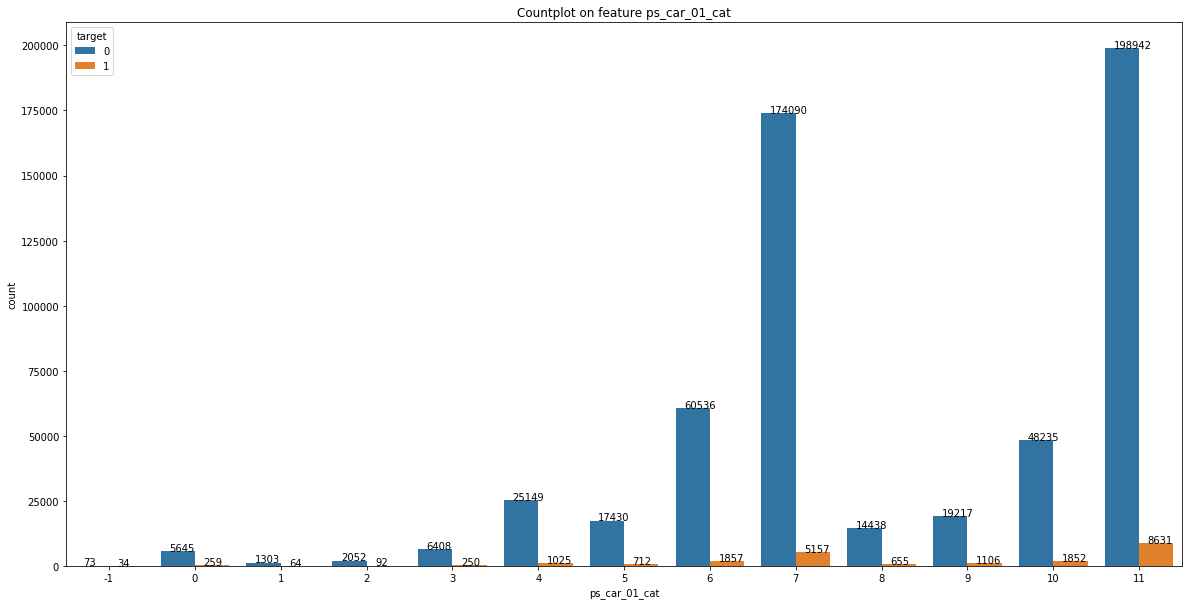

In [13]:
#Countplot on feature 'ps_car_01_cat'

#https://www.codegrepper.com/code-examples/whatever/display+values+on+countplot

fig,size = plt.subplots(figsize=(20,10))
ax2=sns.countplot(cat_features['ps_car_01_cat'],hue='target',data=cat_features,ax=size)
ax2.set_title('Countplot on feature ps_car_01_cat')

for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

uni=np.sort(cat_features['ps_car_01_cat'].unique())
for i in uni:
    total=(cat_features['ps_car_01_cat']==i).sum()
    pos_total=((cat_features['ps_car_01_cat']==i)&(cat_features['target']==1)).sum()
    neg_total=((cat_features['ps_car_01_cat']==i)&(cat_features['target']==0)).sum()
    print("Category=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. Most of the data are dominated by the categories 7 and 11 showing that the insurance was not claimed mostly for them. 
2. The categories 6 and 10 have next significant data count compared to other features. 
3. The categories 0,1,2,3 are very less in numbers and are non-dominant. 
4. The missing category (-1) is also present but are very less in number. 
5. The number of unique categories/Cardinality is high for the feature and it might lead to sparsity in the data when one-hot encoded. 
6. For Categories >5 on average, its more likely seen that the insurance was not claimed.
7. For Categories <=5 on average, the insurance is claimed slightly more or feasible.  

-1    411231
 1    110709
 0     73272
Name: ps_car_03_cat, dtype: int64
Category= -1 Count= 411231 positive= 3.2706678241669525 % negative= 96.72933217583305 %
Category= 0 Count= 73272 positive= 3.9537613276558576 % negative= 96.04623867234415 %
Category= 1 Count= 110709 positive= 4.829778970092765 % negative= 95.17022102990724 %


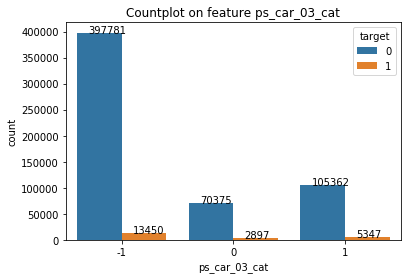

In [14]:
print(cat_features['ps_car_03_cat'].value_counts())
ax1=sns.countplot(cat_features['ps_car_03_cat'],hue='target',data=cat_features)
ax1.set_title('Countplot on feature ps_car_03_cat')
for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
uni=np.sort(cat_features['ps_car_03_cat'].unique())
for i in uni:
    total=(cat_features['ps_car_03_cat']==i).sum()
    pos_total=((cat_features['ps_car_03_cat']==i)&(cat_features['target']==1)).sum()
    neg_total=((cat_features['ps_car_03_cat']==i)&(cat_features['target']==0)).sum()
    print("Category=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

    1. The missing values (-1) are very high in numbers compared to other categories. 
    2. The categories 0 and 1 are having a difference in the distribution of data between them which is significant. 
    3. The cardinality is less for this feature as it has only two categories. 
    4. The missing values shouldn't be imputed in this case and should be considered as a seperate category itself. 
    5. This is because missing values dominate the data and it will not make sense to impute the missing values.
    6. The category=1 has very high probabilty of getting the insurance claimed.
    7. The category=0 or -1 has slightly lesser probability of getting the insurance claimed comparatively.

 0    528009
 6     20662
 4     18344
 1      8322
 3      8233
-1      5809
 2      4184
 5      1649
Name: ps_ind_05_cat, dtype: int64
Category= -1 Count= 5809 positive= 8.331898777758651 % negative= 91.66810122224135 %
Category= 0 Count= 528009 positive= 3.3864953059512244 % negative= 96.61350469404877 %
Category= 1 Count= 8322 positive= 4.782504205719779 % negative= 95.21749579428023 %
Category= 2 Count= 4184 positive= 7.552581261950287 % negative= 92.44741873804972 %
Category= 3 Count= 8233 positive= 4.299769221425969 % negative= 95.70023077857402 %
Category= 4 Count= 18344 positive= 5.206061927605757 % negative= 94.79393807239424 %
Category= 5 Count= 1649 positive= 4.851425106124924 % negative= 95.14857489387508 %
Category= 6 Count= 20662 positive= 5.933597909205305 % negative= 94.0664020907947 %


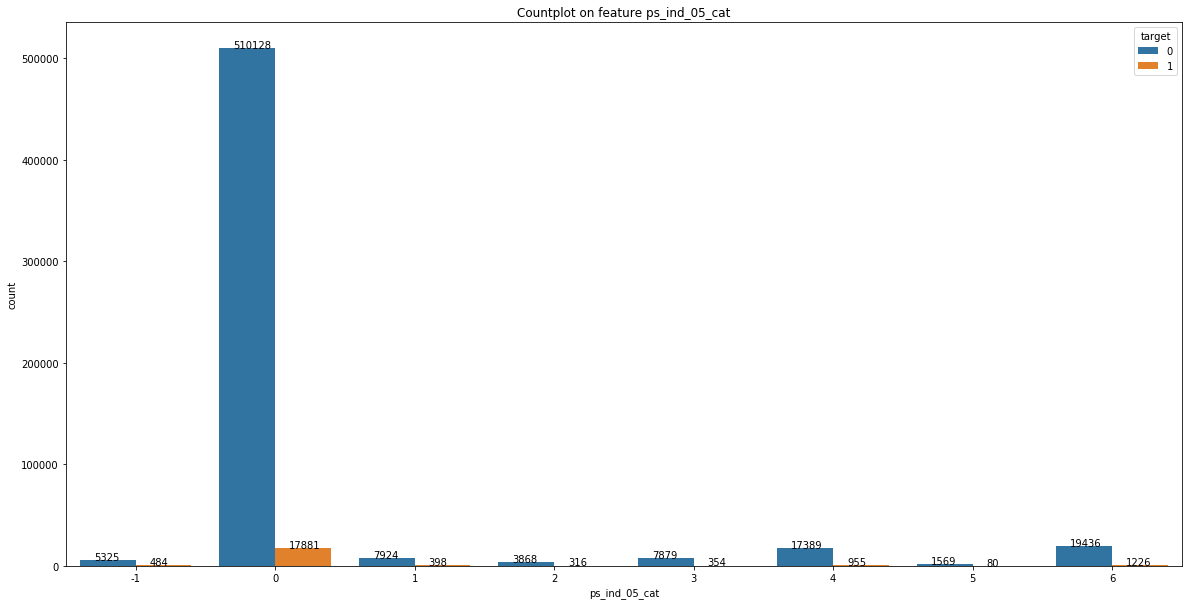

In [15]:
fig,size = plt.subplots(figsize=(20,10))
print(cat_features['ps_ind_05_cat'].value_counts())
ax=sns.countplot(cat_features['ps_ind_05_cat'],hue='target',data=cat_features,ax=size)
ax.set_title('Countplot on feature ps_ind_05_cat')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

uni=np.sort(cat_features['ps_ind_05_cat'].unique())
for i in uni:
    total=(cat_features['ps_ind_05_cat']==i).sum()
    pos_total=((cat_features['ps_ind_05_cat']==i)&(cat_features['target']==1)).sum()
    neg_total=((cat_features['ps_ind_05_cat']==i)&(cat_features['target']==0)).sum()
    print("Category=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The data distribution is dominated by the single category '0' compared to other categories for both the classes. 
2. Remaining features are distributed with data, almost uniformly for both the classes.
3. The missing values are also present in the data which can either be imputed or considered as a seperate feature.
4. The Cardinality of the feature is more which can introduce sparsity in the data when one-hot encoded and create curse of dimensionality.
5. For the Category=2 and 6, the insurance is getting claimed the most compared to other categories.
6. For the Category=0 and 3, the insurance is getting claimed the least and the probability of not getting claimed is more.

 1    553148
 0     30575
-1     11489
Name: ps_car_07_cat, dtype: int64
Category= -1 Count= 11489 positive= 7.816171990599704 % negative= 92.1838280094003 %
Category= 0 Count= 30575 positive= 5.118560915780867 % negative= 94.88143908421914 %
Category= 1 Count= 553148 positive= 3.4766463948165773 % negative= 96.52335360518342 %


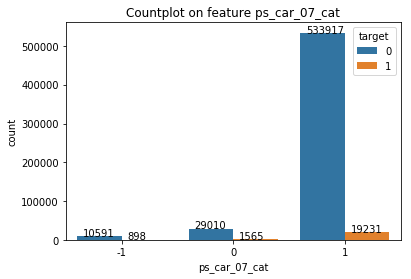

In [16]:


print(cat_features['ps_car_07_cat'].value_counts())
ax=sns.countplot(cat_features['ps_car_07_cat'],hue='target',data=cat_features)
ax.set_title('Countplot on feature ps_car_07_cat')
for p in ax.patches:
        ##print(p.get_x())
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+50))
        
uni=np.sort(cat_features['ps_car_07_cat'].unique())
for i in uni:
    total=(cat_features['ps_car_07_cat']==i).sum()
    pos_total=((cat_features['ps_car_07_cat']==i)&(cat_features['target']==1)).sum()
    neg_total=((cat_features['ps_car_07_cat']==i)&(cat_features['target']==0)).sum()
    print("Category=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The countplot is plotted for the feature 'ps_car_07_cat'
2. The data distribution is dominated by the single category '1' compared to other categories for both the classes.
3. The missing values are also dominant in the data which can either be imputed or considered as a seperate feature. 
4. The Cardinality of the feature is less so there is no sparse data issue.
5. For the category=0, the insurance is claimed the most with around 5.1 % whereas for the category=1, the insurance is claimed less with around 3.5%. 

## Binary Features EDA

In [21]:
#Seggregating binary features which are highlighted as feature important

bin_features=data[['ps_ind_06_bin', 'ps_ind_07_bin','ps_ind_09_bin','ps_ind_16_bin', 'ps_ind_17_bin','target']]
bin_features.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_09_bin,ps_ind_16_bin,ps_ind_17_bin,target
0,0,1,0,0,1,0
1,0,0,0,0,0,0
2,0,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [22]:
#To confirm that they are all binary features.

bin_features.nunique()

ps_ind_06_bin    2
ps_ind_07_bin    2
ps_ind_09_bin    2
ps_ind_16_bin    2
ps_ind_17_bin    2
target           2
dtype: int64

Binary Value= 0 Count= 360852 positive= 4.158491569951115 % negative= 95.84150843004889 %
Binary Value= 1 Count= 234360 positive= 2.8537293053422084 % negative= 97.14627069465779 %


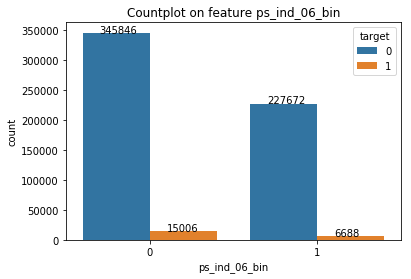

In [23]:
#fig,size = plt.subplots(figsize=(20,10))
ax2=sns.countplot(bin_features['ps_ind_06_bin'],hue='target',data=bin_features)
ax2.set_title('Countplot on feature ps_ind_06_bin')
for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
uni=bin_features['ps_ind_06_bin'].unique()
for i in uni:
    total=(bin_features['ps_ind_06_bin']==i).sum()
    pos_total=((bin_features['ps_ind_06_bin']==i)&(bin_features['target']==1)).sum()
    neg_total=((bin_features['ps_ind_06_bin']==i)&(bin_features['target']==0)).sum()
    print("Binary Value=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The countplot is plotted for the feature 'ps_ind_06_bin'.
2. The distribution of data is dominated by the bin value=0 over bin value=1 for both the classes.
3. There are no missing values in the feature.
4. Comparatively, the feasibility of claiming insurance is higher for binary feature 0 (4.1%) than 1 (2.8%). 

Binary Value= 1 Count= 152989 positive= 4.734980946342548 % negative= 95.26501905365745 %
Binary Value= 0 Count= 442223 positive= 3.267582192694636 % negative= 96.73241780730537 %


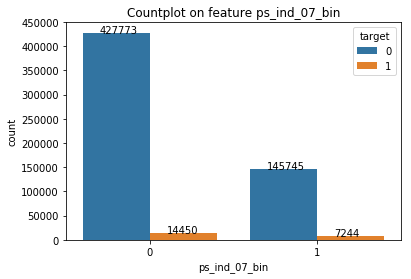

In [24]:
ax2=sns.countplot(bin_features['ps_ind_07_bin'],hue='target',data=bin_features)
ax2.set_title('Countplot on feature ps_ind_07_bin')
#plt.subplot(122)
for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
uni=bin_features['ps_ind_07_bin'].unique()
for i in uni:
    total=(bin_features['ps_ind_07_bin']==i).sum()
    pos_total=((bin_features['ps_ind_07_bin']==i)&(bin_features['target']==1)).sum()
    neg_total=((bin_features['ps_ind_07_bin']==i)&(bin_features['target']==0)).sum()
    print("Binary Value=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The countplot is plotted for the feature 'ps_ind_07_bin'.
2. The distribution of data is significantly dominated by the bin value=0 over bin value=1 for both the classes.
3. There are no missing values in the feature.
4. Comparatively, the feasibility of claiming insurance is slightly higher for binary feature 1 with 4.73% whereas the bin feature= 0 is less with 3.26%. 

Binary Value= 0 Count= 484917 positive= 3.7183682980798776 % negative= 96.28163170192012 %
Binary Value= 1 Count= 110295 positive= 3.32109343125255 % negative= 96.67890656874745 %


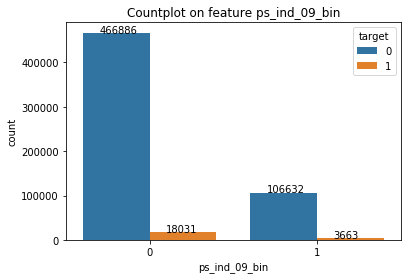

In [25]:
ax2=sns.countplot(bin_features['ps_ind_09_bin'],hue='target',data=bin_features)
ax2.set_title('Countplot on feature ps_ind_09_bin')
#plt.subplot(122)
for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
uni=bin_features['ps_ind_09_bin'].unique()
for i in uni:
    total=(bin_features['ps_ind_09_bin']==i).sum()
    pos_total=((bin_features['ps_ind_09_bin']==i)&(bin_features['target']==1)).sum()
    neg_total=((bin_features['ps_ind_09_bin']==i)&(bin_features['target']==0)).sum()
    print("Binary Value=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The countplot is plotted for the feature 'ps_ind_09_bin'.
2. The distribution of data is significantly dominated by the bin value=0 over bin value=1 for both the classes.
3. There are no missing values in the feature.
4. The feasibility of claiming insurance is almost equal for both binary classes 1 and 0.

Binary Value= 0 Count= 201882 positive= 4.371365451105101 % negative= 95.6286345488949 %
Binary Value= 1 Count= 393330 positive= 3.271807388198205 % negative= 96.72819261180179 %


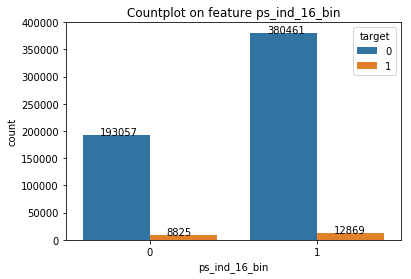

In [26]:
ax2=sns.countplot(bin_features['ps_ind_16_bin'],hue='target',data=bin_features)
ax2.set_title('Countplot on feature ps_ind_16_bin')

#plt.subplot(122)
for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
uni=bin_features['ps_ind_16_bin'].unique()
for i in uni:
    total=(bin_features['ps_ind_16_bin']==i).sum()
    pos_total=((bin_features['ps_ind_16_bin']==i)&(bin_features['target']==1)).sum()
    neg_total=((bin_features['ps_ind_16_bin']==i)&(bin_features['target']==0)).sum()
    print("Binary Value=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The countplot is plotted for the feature 'ps_ind_16_bin'.
2. The distribution of data is significantly dominated by the bin value=1 over bin value=0 for both the classes.
3. There are no missing values in the feature.
4. The feasibility of not claiming any insurance is more for binary class 1 than 0.

Binary Value= 1 Count= 72069 positive= 5.515547600216459 % negative= 94.48445239978354 %
Binary Value= 0 Count= 523143 positive= 3.3870280210191095 % negative= 96.6129719789809 %


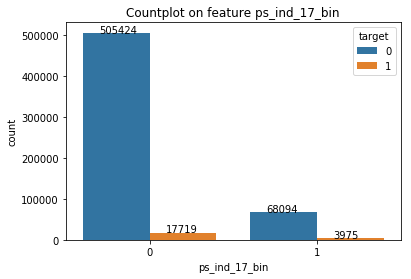

In [27]:
ax2=sns.countplot(bin_features['ps_ind_17_bin'],hue='target',data=bin_features)
ax2.set_title('Countplot on feature ps_ind_17_bin')

#plt.subplot(122)
for p in ax2.patches:
        ax2.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
uni=bin_features['ps_ind_17_bin'].unique()
for i in uni:
    total=(bin_features['ps_ind_17_bin']==i).sum()
    pos_total=((bin_features['ps_ind_17_bin']==i)&(bin_features['target']==1)).sum()
    neg_total=((bin_features['ps_ind_17_bin']==i)&(bin_features['target']==0)).sum()
    print("Binary Value=",i,"Count=",total,"positive=",pos_total*100/total,"%","negative=",neg_total*100/total,"%")

1. The countplot is plotted for the feature 'ps_ind_17_bin'.
2. The distribution of data is significantly dominated by the bin value=0 over bin value=1 for both the classes.
3. There are no missing values in the feature.
4. The feasibility of claiming insurance is higher for binary class 0 with around 5.51% of the train data.
5. The feasibility of claiming insurance is less for binary class 1 with around only 3.38% of the train data.

## Continuous Feature EDA

In [28]:
#Seggregating the feature selected Continuous features.

reg_features=data[['ps_ind_03','ps_ind_15','ps_reg_01', 'ps_reg_02', 'ps_reg_03','ps_car_13','target']]
reg_features.head()


,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_13,target
0,5,11,0.7,0.2,0.718070,0.883679,0
1,7,3,0.8,0.4,0.766078,0.618817,0
2,9,12,0.0,0.0,-1.000000,0.641586,0
3,2,8,0.9,0.2,0.580948,0.542949,0
4,0,9,0.7,0.6,0.840759,0.565832,0


In [29]:
reg_features.nunique()

ps_ind_03       12
ps_ind_15       14
ps_reg_01       10
ps_reg_02       19
ps_reg_03     5013
ps_car_13    70482
target           2
dtype: int64

[Text(0.5,1,'Boxplot on feature ps_ind_03')]

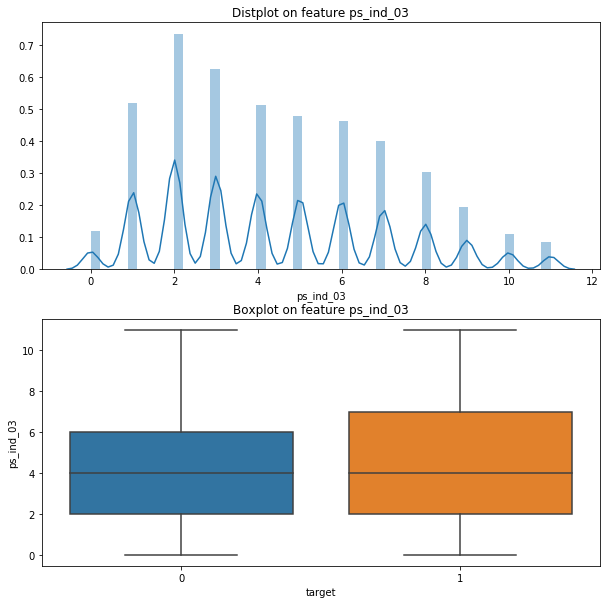

In [30]:
fig, axs = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(reg_features['ps_ind_03'],ax=axs[0]).set(title='Distplot on feature ps_ind_03')
sns.boxplot(reg_features['target'],reg_features['ps_ind_03'],data=reg_features,ax=axs[1]).set(title='Boxplot on feature ps_ind_03')

    1. Distribution and Box plot is plotted for the feature 'ps_ind_03'.
    2. There are certain values which are dominant compared to the others.
    3. There are no missing values as such from the plot .
    4. There are very few distinct values in the continuous feature.
    5. The distribution of data for both the classes upto 50th percentile is very similar.
    6. For the class 0, the 75th percentile feature value has extended till 6.
    7. If the value is greater than 6, then the probability of getting claimed is more.


[Text(0.5,1,'Boxplot on feature ps_ind_15')]

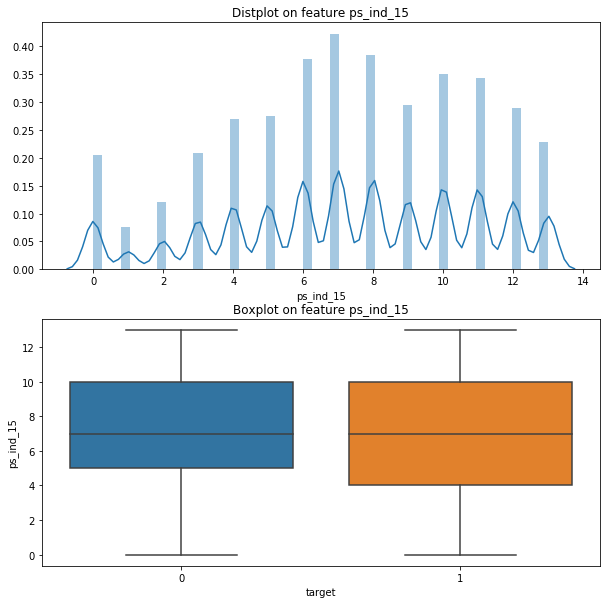

In [31]:
fig, axs = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(reg_features['ps_ind_15'],ax=axs[0]).set(title='Distplot on feature ps_ind_15')
sns.boxplot(reg_features['target'],reg_features['ps_ind_15'],data=reg_features).set(title='Boxplot on feature ps_ind_15')

    1. Distribution and box plot is plotted for the feature 'ps_ind_15'.
    2. There are certain values which are dominant compared to the others and there are other values which are least dominant.
    3. There are no missing values as such from the plot.
    4. The distribution of data for both the classes between 50th percentile and 75th percentile is very similar.
    5. The distribution of data is not very well seperated between the classes However The 25th percentile of class 1 is little skewed when compared to the class 0 which could be useful to predict the difference between classes.
    6. There is a high chance of claiming insurance when the feature variable has value between 4 and 5.

[Text(0.5,1,'Boxplot on feature ps_reg_01')]

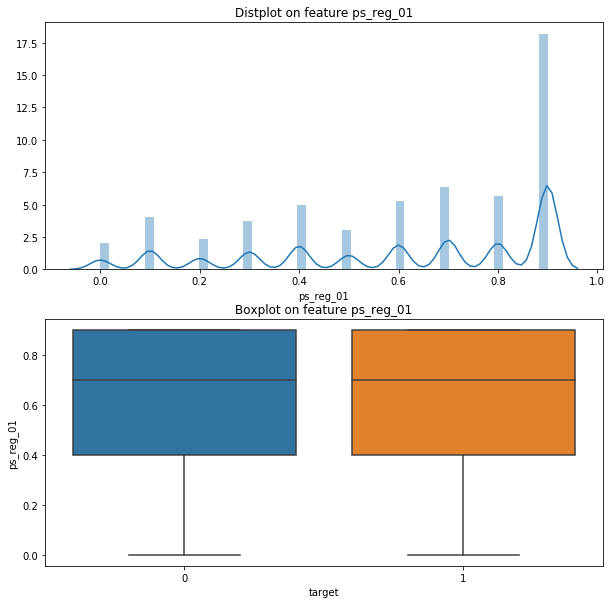

In [32]:
fig, axs = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(reg_features['ps_reg_01'],ax=axs[0]).set(title='Distplot on feature ps_reg_01')
sns.boxplot(reg_features['target'],reg_features['ps_reg_01'],data=reg_features).set(title='Boxplot on feature ps_reg_01')

    1. Distribution and Box plot is plotted for the feature 'ps_reg_01'.
    2. There is only one single dominant value in the plot and rest all of them looks to be distributed almost equally.
    3. There are no missing values as such from the plot.
    4. There are very few distinct values in the continuous feature.
    5.The distribution of data for both the classes are very similar. It is not well distributed differentiating the classes so the feature will not be very effective in the prediction.

[Text(0.5,1,'Boxplot on feature ps_reg_02')]

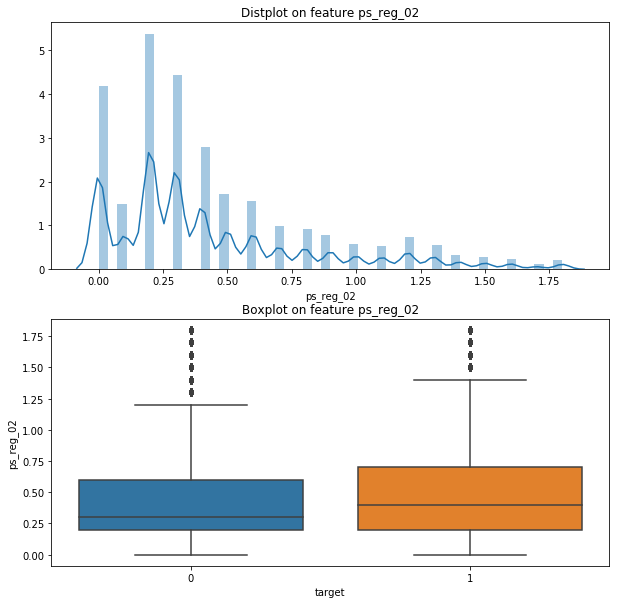

In [33]:
fig, axs = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(reg_features['ps_reg_02'],ax=axs[0]).set(title='Distplot on feature ps_reg_02')
sns.boxplot(reg_features['target'],reg_features['ps_reg_02'],data=reg_features).set(title='Boxplot on feature ps_reg_02')

    1. Distribution and Box plot is plotted for the feature 'ps_reg_02'.
    2. There are few values which are dominant and the remaining values looks to be distributed almost equally.
    3. There are no missing values as such from the plot.
    4. The distribution of data for both the classes are not very similar.The 50th and the 75th percentile are different between the classes and the data is skewed differently for both the classes.
    5. The slight change in the distribution between the classes could be useful to predict the outcomes accurately.
    6. The chances of insurance getting claimed is high if the range of continuous value is greater than 0.62.

[Text(0.5,1,'Boxplot on feature ps_reg_03')]

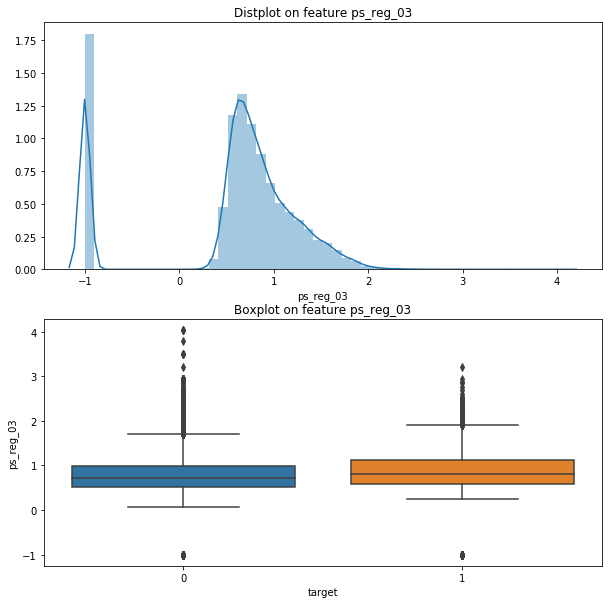

In [34]:
fig, axs = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(reg_features['ps_reg_03'],ax=axs[0]).set(title='Distplot on feature ps_reg_03')
sns.boxplot(reg_features['target'],reg_features['ps_reg_03'],data=reg_features).set(title='Boxplot on feature ps_reg_03')

    1. Distribution and Box plot is plotted for the feature 'ps_reg_03'.
    2. There are few values which are dominant and the remaining values looks to be distributed almost equally.
    3. The missing values are very much high in numbers compared to the other values.
    4. The missing values can be replaced by any of the imputation methods.
    5. The distribution of data for both the classes are not very different. But the 50th and the 75th percentile are different between the classes and the data is skewed differently for both the classes.
    6. The slight change in the distribution between the classes could be useful to predict the outcomes accurately.

[Text(0.5,1,'Boxplot on feature ps_car_13')]

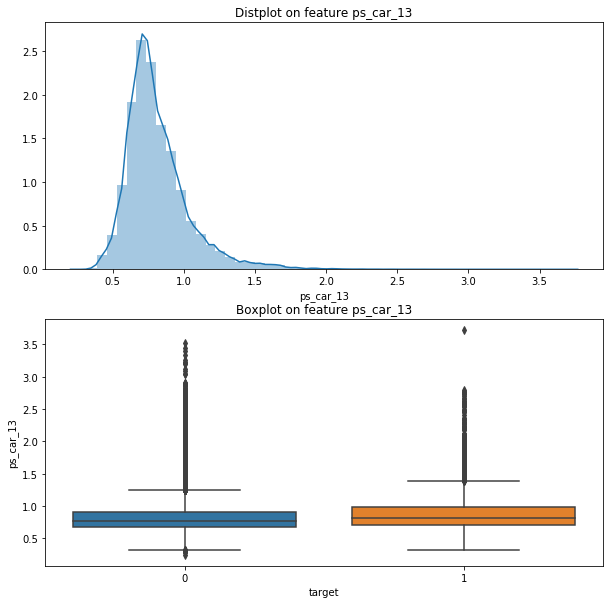

In [35]:
fig, axs = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(reg_features['ps_car_13'],ax=axs[0]).set(title='Distplot on feature ps_car_13')
sns.boxplot(reg_features['target'],reg_features['ps_car_13'],data=reg_features).set(title='Boxplot on feature ps_car_13')

    1. Distribution and Box plot is plotted for the feature 'ps_car_13'.
    2. There are few values which are dominant and the remaining values looks to be distributed almost equally.
    3. There are no missing values in the feature.
    4. The distribution is peaked around the values 0.5 and 1.5 and is right skewed .
    5. The distribution of data for both the classes are not very different. But the 50th and the 75th percentile are slightly different between the classes and the data is skewed differently for both the classes.
    6. The level of outliers are skewed much for the class=0 than class=1. This could be useful while prediction as they are slightly different to each other. 
    7. The slight change in the distribution between the classes could be useful to predict the outcomes accurately.

## BIVARIATE ANALYSIS

In [11]:
#cat_features=data[['ps_car_01_cat', 'ps_car_03_cat','ps_ind_05_cat', 'ps_car_07_cat','target']]
multi=data[['ps_ind_03', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_09_bin', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin',
       'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_03_cat',
       'ps_car_07_cat', 'ps_car_13','target']]


[Text(0.5,1,'boxplot between ps_car_03_cat and ps_reg_03')]

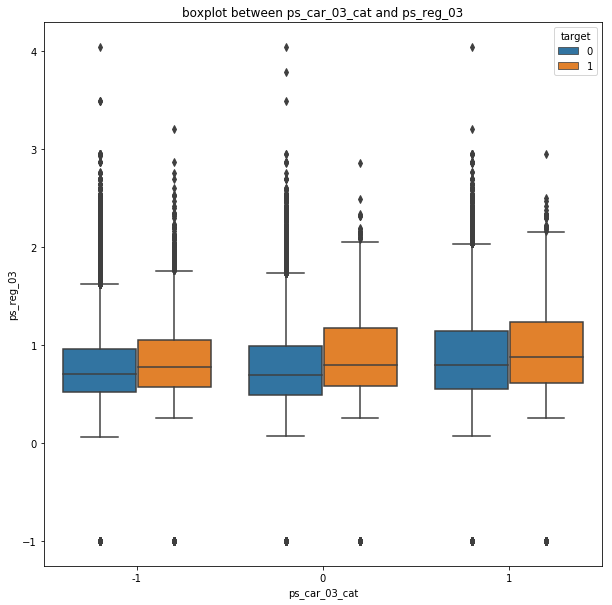

In [12]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='ps_car_03_cat',y='ps_reg_03',hue='target',data=multi).set(title='boxplot between ps_car_03_cat and ps_reg_03')


    1. The box plot is plotted between 'ps_car_03_cat'and 'ps_reg_03'
    2. The insurance is claimed with high probability when the ps_reg_03 is greater than 1 for all the categorical feature values of ps_car_03_cat.
    3. The insurance is least claimed when the ps_reg_03 is closer to 0 or less than 1 for all the categorical feature values of ps_car_03_cat. 
    

In [13]:
#sns.pairplot(cat_features,hue='target')

[Text(0.5,1,'boxplot between ps_car_03_cat and ps_reg_02')]

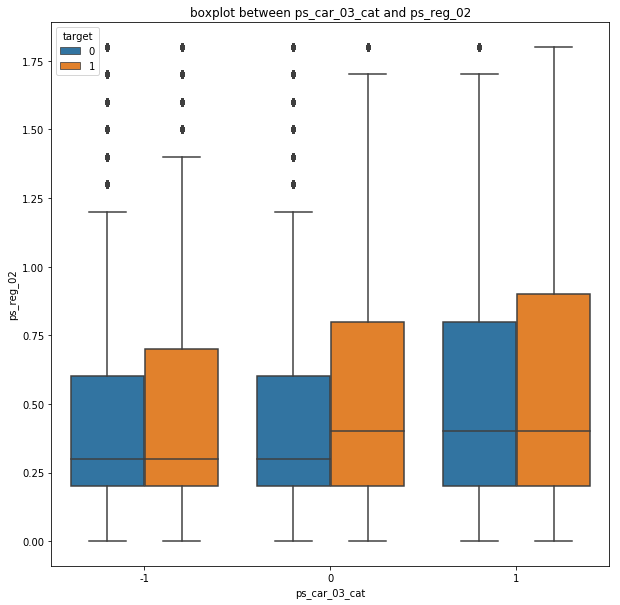

In [13]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='ps_car_03_cat',y='ps_reg_02',hue='target',data=multi).set(title='boxplot between ps_car_03_cat and ps_reg_02')

    1. The box plot is plotted between 'ps_car_03_cat'and 'ps_reg_02'
    2. The insurance is claimed with high probability when the ps_reg_02 is greater than 0.62 for the categorical feature values -1 and 0 of ps_car_03_cat.
    3. For the categorical values=1, the insurance gets claimed mostly when the ps_reg_02 is greater than 0.80. 
   

[Text(0.5,1,'boxplot between ps_car_01_cat and ps_car_13')]

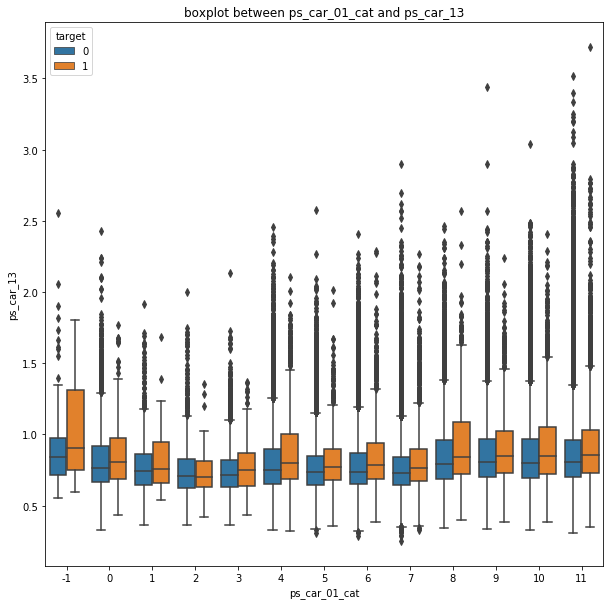

In [14]:

plt.subplots(figsize=(10,10))
sns.boxplot(x='ps_car_01_cat',y='ps_car_13',hue='target',data=multi).set(title='boxplot between ps_car_01_cat and ps_car_13')

    1. The box plot is plotted between 'ps_car_01_cat'and 'ps_car_13'
    2. The insurance is claimed with high probability when the ps_car_13 is greater than 0.9 for all the categorical feature values of ps_car_01_cat.
    3. For most of the categorical values, the ps_car_13 value of claiming insurance is always higher than that of non-claiming class by some margin. 
    4. For the category=2, the values are almost equal
   

[Text(0.5,1,'boxplot between ps_ind_07_bin and ps_car_13')]

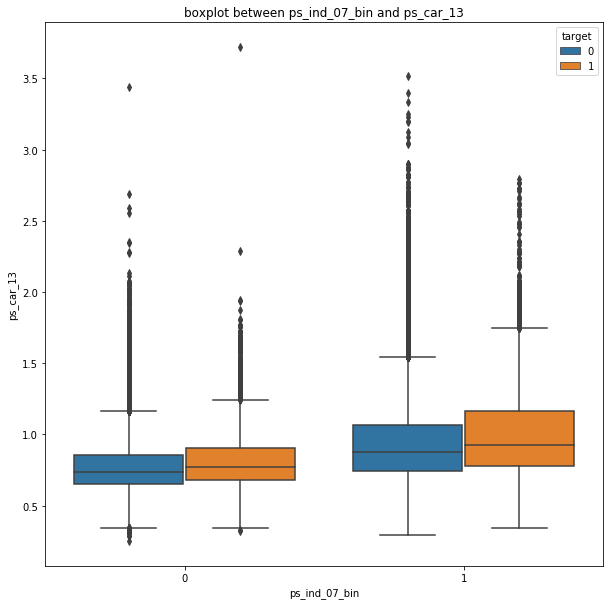

In [15]:
plt.subplots(figsize=(10,10))
sns.boxplot(x='ps_ind_07_bin',y='ps_car_13',hue='target',data=multi).set(title='boxplot between ps_ind_07_bin and ps_car_13')

1. The box plot is plotted between 'ps_ind_07_bin'and 'ps_car_13'
2. For both the binary values, the range of'ps_car_13' feature value under claiming insurance is always higher than that of non-claiming class by some margin. 
3. For both the categories, there is no significant distinction in the distribution of data to classify the classes accurately.
4. There is a overlap of data in the features between both the classes.

[Text(0.5,1,'boxplot between ps_ind_16_bin and ps_ind_03')]

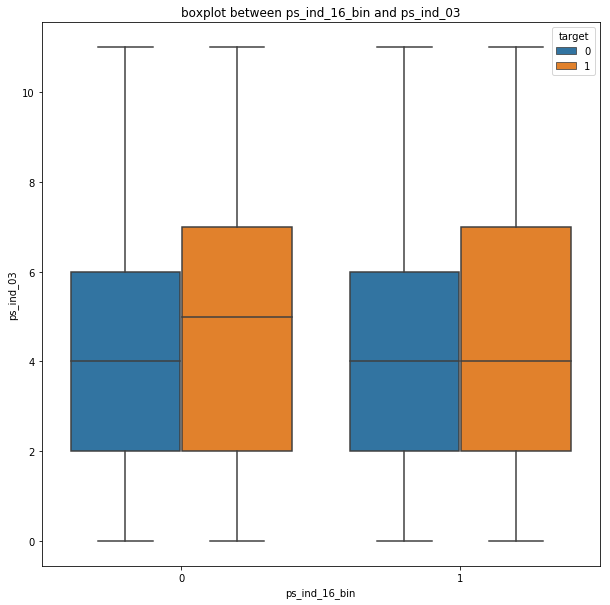

In [16]:
plt.subplots(figsize=(10,10))#ps_ind_16_bin
sns.boxplot(x='ps_ind_16_bin',y='ps_ind_03',hue='target',data=multi).set(title='boxplot between ps_ind_16_bin and ps_ind_03')

1. The box plot is plotted between 'ps_ind_16_bin'and 'ps_ind_03'
2. For both the binary values, if the value of ps_ind_03 is greater than 6, then there is a high probability of insurance getting claimed. 
3. For both the categories, the distribution of data is exactly the same upto the value of ps_ind_03=6.
4. There is a overlap of data distribution in the features between both the classes.